# Asteroids & Meteorites Impacts Analysis & Visualization

## Dataset No.1
### This DataSet contains around 1 million records of all detected asteroids in space and their properties

### The asteroids orbit data was collected by NASA's Near Earth Object Program at the Jet Propulsion Laboratory (California Institute of Technology).

### Data Features:

#### SPK-ID: Object primary SPK-ID
#### Object ID: Object internal database ID
#### Object fullname: Object full name/designation
#### pdes: Object primary designation
#### name: Object IAU name
#### NEO: Near-Earth Object (NEO) flag
#### PHA: Potentially Hazardous Asteroid (PHA) flag
#### H: Absolute magnitude parameter
#### Diameter: object diameter (from equivalent sphere) km Unit
#### Orbit_id: Orbit solution ID
#### moid_ld: Earth Minimum Orbit Intersection Distance au Unit


In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
from geopy.geocoders import Nominatim
from datetime import datetime
from geopy.point import Point
from datasist.structdata import detect_outliers
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [6, 6]}, font_scale=1)

In [74]:
# import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv('dataset.csv')

#df.to_csv('finaldata.csv', index=False)
#neo near earth or not
# pha potential hazardious or not
# H magnitude
# a - semi major axis au unit
# q prelenion distance au unit
#The only object that has ever been rated at 4 on the Torino Scale (since downgraded), the Aten asteroid (99942) Apophis, has an Earth MOID of 0.000316 AU. This is not the smallest Earth MOID in the catalogues; many bodies with a small Earth MOID are not classed as PHO's because the objects are less than roughly 140 meters in diameter (or absolute magnitude, H < 22). Earth MOID values are generally more practical for asteroids less than 140 meters in diameter as those asteroids are very dim and often have a short observation arc with a poorly determined orbit. The only objects that have been detected and had their Earth-MOID calculated before Earth impact were the small asteroids 2008 TC3 and 2014 AA. 2008 TC3 was listed with a MOID of 0.00001 AU in the Minor Planet Center database, and is the smallest MOID calculated for an Apollo asteroid.[4] It is even smaller at the more precise JPL Small Body Database (0.0000078 AU).[5]

# astronomy, the term period usually refers to how long an object takes to complete one cycle of revolution. In particular the orbital period of a star or planet is the time it takes to return to the same place in the orbit. The spin period of a star is the time it takes to rotate on its axis.

C:\Users\101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning & Feature Engineering

In [75]:
df=df.drop(df.columns[[4, 5, 10, 11, 22, 24, 25, 26, 27]], axis=1)
df.drop(['sigma_e', 'sigma_a','sigma_q','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','equinox'], axis=1, inplace=True)
df=df.rename(columns={'neo': 'Near-Earth', 'pha': 'potential hazards', 'H': 'absolute magnitude', 'e': 'eccentricity', 'a': 'semi-major axis', 'q': 'perihelion distance', 'i': 'inclination', 'om': 'omega', 'ma': 'median anomaly', 'per': 'period', 'per_y': 'period year'})
df=df.drop(df.columns[[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23]], axis=1)
pd.set_option('display.max_columns', None)
df

,id,spkid,full_name,pdes,Near-Earth,potential hazards,absolute magnitude,diameter,orbit_id,moid,moid_ld,class
0,a0000001,2000001,1 Ceres,1,N,N,3.400,939.400,JPL 47,1.594780,620.640533,MBA
1,a0000002,2000002,2 Pallas,2,N,N,4.200,545.000,JPL 37,1.234290,480.348639,MBA
2,a0000003,2000003,3 Juno,3,N,N,5.330,246.596,JPL 112,1.034290,402.514639,MBA
3,a0000004,2000004,4 Vesta,4,N,N,3.000,525.400,JPL 35,1.139480,443.451432,MBA
4,a0000005,2000005,5 Astraea,5,N,N,6.900,106.699,JPL 114,1.095750,426.433028,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,NaN,JPL 5,0.861979,335.456367,MBA
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,NaN,8,0.671242,261.227249,MBA
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,NaN,17,0.035589,13.850093,APO
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,NaN,JPL 3,0.893896,347.877506,MBA


In [76]:
df.describe()

,spkid,absolute magnitude,diameter,moid,moid_ld
count,9.585240e+05,952261.000000,136209.000000,9.386030e+05,958397.000000
mean,3.810114e+06,16.906411,5.506429,1.415162e+00,539.364207
std,6.831541e+06,1.790405,9.425164,2.156731e+00,834.306975
min,2.000001e+06,-1.100000,0.002500,4.544120e-07,0.000000
25%,2.239632e+06,16.100000,2.780000,9.797020e-01,375.394939
50%,2.479262e+06,16.900000,3.972000,1.240850e+00,477.706175
75%,3.752518e+06,17.714000,5.765000,1.593370e+00,617.324804
max,5.401723e+07,33.200000,939.400000,7.947660e+01,30929.908422


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  958524 non-null  object 
 1   spkid               958524 non-null  int64  
 2   full_name           958524 non-null  object 
 3   pdes                958524 non-null  object 
 4   Near-Earth          958520 non-null  object 
 5   potential hazards   938603 non-null  object 
 6   absolute magnitude  952261 non-null  float64
 7   diameter            136209 non-null  float64
 8   orbit_id            958524 non-null  object 
 9   moid                938603 non-null  float64
 10  moid_ld             958397 non-null  float64
 11  class               958524 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 87.8+ MB


In [78]:
df.isnull().sum()

id                         0
spkid                      0
full_name                  0
pdes                       0
Near-Earth                 4
potential hazards      19921
absolute magnitude      6263
diameter              822315
orbit_id                   0
moid                   19921
moid_ld                  127
class                      0
dtype: int64

# Data Preprocessing & ETL - EDA

In [79]:
def to_numeric(x):
    if x == 'Y':
        return 1
    else:
        return 0

def impact(x):
    if x < 0.0004:
        return 1
    else:
        return 0
df['impact']=df['moid'].apply(impact)
df['potential hazards']=df['potential hazards'].apply(to_numeric)
df['Near-Earth']=df['Near-Earth'].apply(to_numeric)

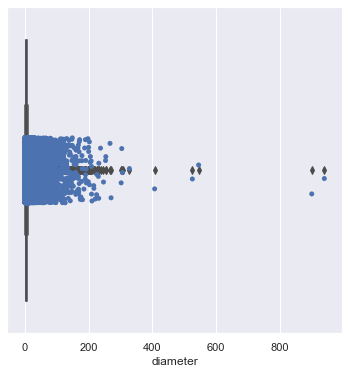

In [9]:
sns.boxplot(x='diameter',data=df)
sns.stripplot(x='diameter',data=df)
plt.savefig('out.png')

In [81]:
df['Mass'].mean()

36548.744477311884

In [82]:
df['diameter'].mean()

5.506429057551376

In [83]:
df['volume'].mean()

12182.914825772745

In [80]:
df['radius (km)']=df['diameter']/2
df['volume']=(4/3)*3.14*(df['radius (km)'])**3
df['Mass']=3*df['volume']

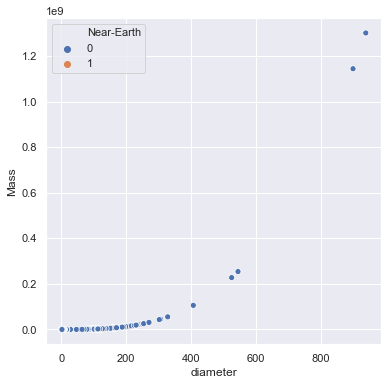

In [14]:
sns.scatterplot(x='diameter',y='Mass',hue='Near-Earth',data=df)
plt.savefig('mm.png')

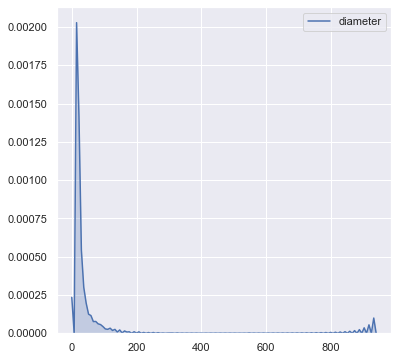

In [15]:
sns.kdeplot(df['diameter'],shade=True)

In [16]:
df['Mass'].mean()

36548.744477311884

In [17]:
df['volume'].mean()

12182.914825772745

In [18]:
df['diameter'].mean()

5.506429057551376

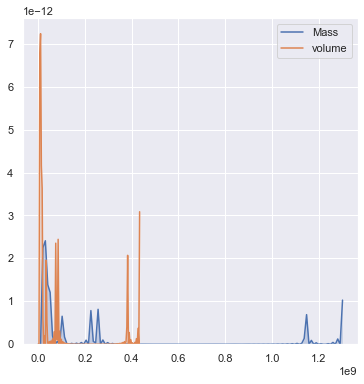

In [19]:
sns.kdeplot(df['Mass'],shade=True)
sns.kdeplot(df['volume'],shade=True)
plt.savefig('mvv.png')

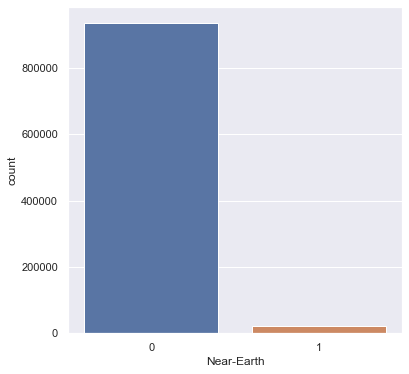

In [20]:
sns.countplot(x='Near-Earth',data=df)
plt.savefig('sdfsdfv.png')

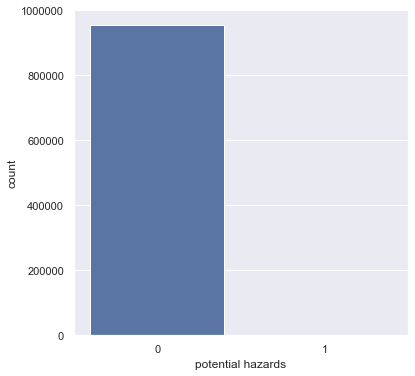

In [21]:
sns.countplot(x='potential hazards',data=df)
plt.savefig('sdfdfvv.png')

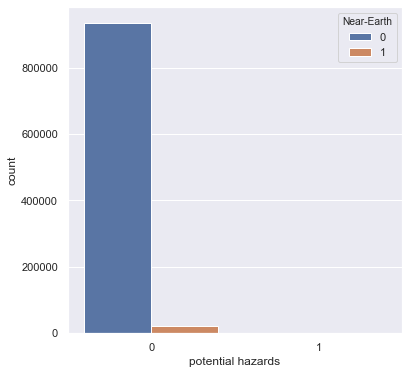

In [22]:
sns.countplot(x='potential hazards',data=df,hue='Near-Earth')
plt.savefig('sadfasfdv.png')

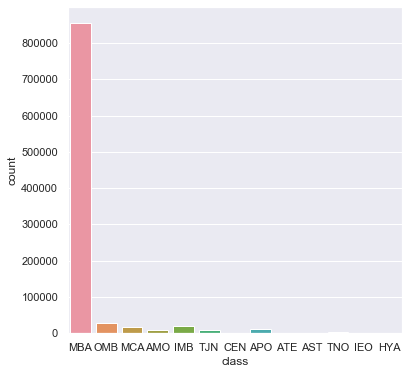

In [23]:
# Main Belt Asteroid The asteroid belt is a torus-shaped region in the Solar System, located roughly between the orbits of the planets Jupiter and Mars. It contains a great many solid, irregularly shaped bodies, of many sizes but much smaller than planets
sns.countplot(x='class',data=df)
plt.savefig('msdsd.png')

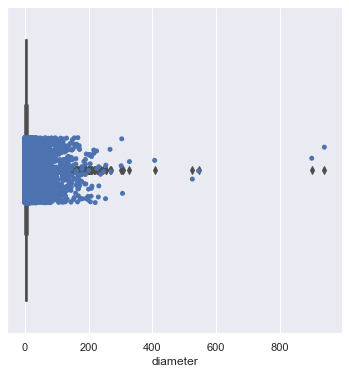

In [39]:
sns.boxplot(x='diameter',data=df)
sns.stripplot(x='diameter',data=df)
plt.savefig('out2.png')

In [40]:
indices=detect_outliers(df,0,[['diameter']])
df.loc[indices,'diameter']=df['diameter'].median()

In [43]:
df['Mass'].mean()

98.38465609643215

In [44]:
df['volume'].mean()

32.79488536441129

In [45]:
df['diameter'].mean()

3.9720000000426254

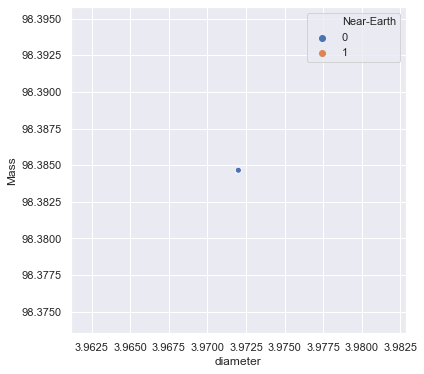

In [46]:
sns.scatterplot(x='diameter',y='Mass',hue='Near-Earth',data=df)

# Near Earth Objects Analysis

In [84]:
df3=df[df['Near-Earth']==1]
df3

,id,spkid,full_name,pdes,Near-Earth,potential hazards,absolute magnitude,diameter,orbit_id,moid,moid_ld,class,impact,radius (km),volume,Mass
432,a0000433,2000433,433 Eros (1898 DQ),433,1,0,10.400,16.840,656,0.148623,57.839613,AMO,0,8.4200,2499.220987,7497.662961
718,a0000719,2000719,719 Albert (1911 MT),719,1,0,15.400,NaN,JPL 214,0.203482,79.189090,AMO,0,NaN,NaN,NaN
886,a0000887,2000887,887 Alinda (1918 DB),887,1,0,13.800,4.200,223,0.082217,31.996351,AMO,0,2.1000,38.772720,116.318160
1035,a0001036,2001036,1036 Ganymed (1924 TD),1036,1,0,9.400,37.675,783,0.344956,134.246527,AMO,0,18.8375,27985.829289,83957.487867
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,1,0,17.700,1.000,JPL 88,0.107451,41.816706,AMO,0,0.5000,0.523333,1.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958510,bK20K04M,54017229,(2020 KM4),2020 KM4,1,0,27.898,NaN,JPL 1,0.005380,2.093544,APO,0,NaN,NaN,NaN
958511,bK20K04N,54017231,(2020 KN4),2020 KN4,1,0,21.510,NaN,JPL 1,0.057911,22.537107,APO,0,NaN,NaN,NaN
958512,bK20K04O,54017230,(2020 KO4),2020 KO4,1,0,26.980,NaN,JPL 1,0.003895,1.515833,APO,0,NaN,NaN,NaN
958513,bK20K04Q,54017232,(2020 KQ4),2020 KQ4,1,0,26.419,NaN,JPL 1,0.002528,0.983884,APO,0,NaN,NaN,NaN


In [318]:
indices=detect_outliers(df3,0,[['diameter']])
df3.loc[indices,'diameter']=df3['diameter'].median()
df3['diameter'].fillna(df3['diameter'].mean(),inplace=True)

C:\Users\101\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\101\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [319]:
df3['radius (km)']=df3['diameter']/2
df3['volume']=(4/3)*3.14*(df3['radius (km)'])**3
df3['Mass']=3*df3['volume']

C:\Users\101\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\101\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\101\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

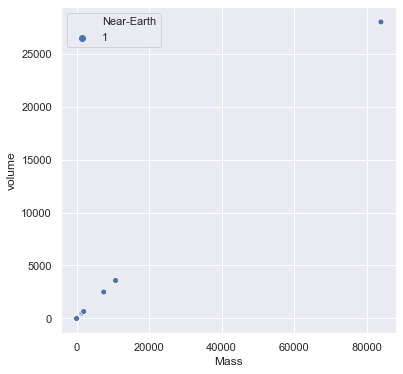

In [58]:
sns.scatterplot(x='Mass',y='volume',hue='Near-Earth',data=df3)
plt.savefig('hh2.png')

In [88]:
df3['Mass'].mean()

137.3691618978303

In [86]:
df3['volume'].mean()

45.78972063261015

In [225]:
df3['volume'].mean()

0.17950333333329496

In [87]:
df3['diameter'].mean()

1.168998233215548

In [191]:
df3['diameter'].mean()

0.7000000000002901

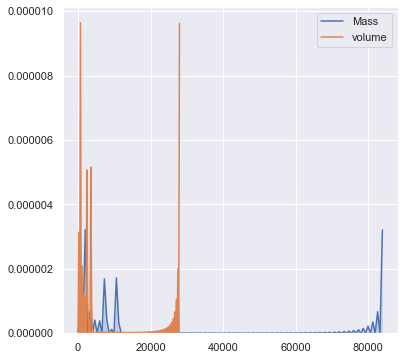

In [59]:
sns.kdeplot(df3['Mass'],shade=True)
sns.kdeplot(df3['volume'],shade=True)
plt.savefig('tobytoby.png')

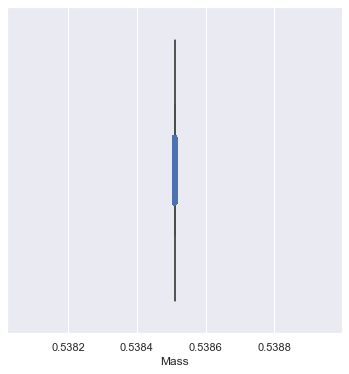

In [322]:
sns.boxplot(x='Mass',data=df3)
sns.stripplot(x='Mass',data=df3)
plt.savefig('gamed')

In [323]:
df3['Mass'].mean()

0.5385100000001927

In [324]:
df3['volume'].mean()

0.17950333333329496

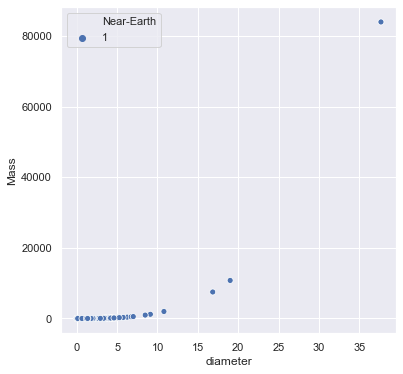

In [238]:
sns.scatterplot(x='diameter',y='Mass',hue='Near-Earth',data=df3)
plt.savefig('edgsdgdsg.png')

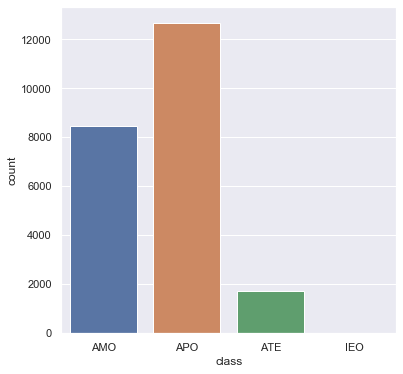

In [239]:
sns.countplot(x='class',data=df3)
plt.savefig('ff4.png')


## Dataset No.2
### Sentry is a highly automated collision monitoring system that continually scans the most current asteroid catalog for possibilities of future impact with Earth over the next 100 years. This dataset includes the Sentry system's list of possible asteroid impacts with Earth and their probability

### The asteroid orbit and impact risk data was collected by NASA's Near Earth Object Program at the Jet Propulsion Laboratory (California Institute of Technology).

### Data Features:

#### Period Start: First  Possible Impact detected from asteroid
#### Period End: Last  Possible Impact detected from asteroid
#### Possible Impacts: Number of Possible Impacts detected
#### Cumulative Impact Probability: Sum of the impact probabilities from all detected potential impacts

In [89]:
df=pd.read_csv('impacts.csv')
df

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
...,...,...,...,...,...,...,...,...,...,...,...
678,2014 KW76,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0
679,2012 FN,2115,2115,1,2.300000e-08,3.27,29.2,0.005,-10.18,-10.20,0
680,101955 Bennu (1999 RQ36),2175,2199,78,3.700000e-04,5.99,20.2,0.490,-1.71,-2.32,(*)
681,410777 (2009 FD),2185,2198,7,1.600000e-03,15.87,22.1,0.160,-1.78,-1.83,(*)


In [90]:
df.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [91]:
df.isnull().sum()

Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64

In [92]:
df['radius (km)']=df['Asteroid Diameter (km)']/2
df['volume']=(4/3)*3.14*(df['radius (km)'])**3
df['Mass']=3*df['volume']
df['Kinetic Energy']=0.5*df['Mass']*(df['Asteroid Velocity'])**2
df.to_csv('impact_new', index=False)

In [ ]:
df.to_csv('impacts_up.csv')

In [93]:
df[(df['Cumulative Impact Probability']==max(df['Cumulative Impact Probability']))]

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,radius (km),volume,Mass,Kinetic Energy
568,2010 RF12,2095,2115,52,0.065,5.1,28.4,0.007,-3.2,-3.2,0,0.0035,1.795033e-07,5.385100e-07,0.000007


In [94]:
df[(df['Possible Impacts']==max(df['Possible Impacts']))]

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,radius (km),volume,Mass,Kinetic Energy
22,2008 EM68,2017,2115,1144,0.000013,14.54,27.8,0.01,-5.31,-5.65,0,0.005,5.233333e-07,0.000002,0.000166


In [95]:
df[(df['Mass']==max(df['Mass']))]

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,radius (km),volume,Mass,Kinetic Energy
173,2011 SR52,2034,2115,4,7.600000e-10,13.55,15.6,2.579,-4.35,-4.59,0,1.2895,8.977025,26.931074,2472.306289


In [96]:
# 2010 AU118 would be the most disastrous meteroit but it has very low propality of landing
df[(df['Kinetic Energy']==max(df['Kinetic Energy']))]

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,radius (km),volume,Mass,Kinetic Energy
58,2010 AU118,2020,2112,38,1.800000e-08,25.22,16.2,1.9,-2.73,-3.16,0,0.95,3.589543,10.76863,3424.684941


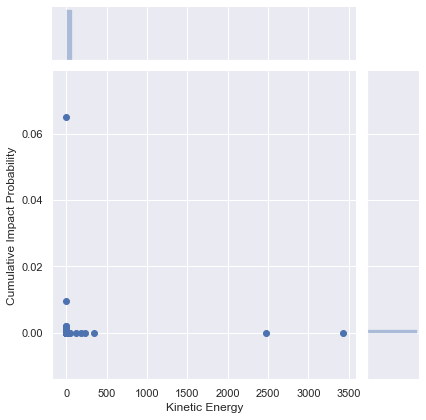

In [220]:
# most asteroids with high possiple impacts has low kinetic energy
#the asteroid with highest kinetic energy has low propaplity of landing
sns.jointplot(x='Kinetic Energy',y='Cumulative Impact Probability',kind='scatter',data=df)
plt.savefig('kk.png')

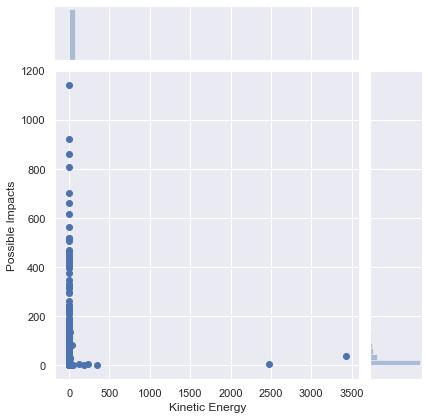

In [221]:
# most asteroids with high possiple impacts has low kinetic energy
#the asteroid with highest kinetic energy has low propaplity of landing
sns.jointplot(x='Kinetic Energy',y='Possible Impacts',kind='scatter',data=df)
plt.savefig('kk.png')

In [199]:
# years with most Possible impacts
df.sort_values('Possible Impacts', ascending=False)['Period End'].head(10)

22    2115
18    2114
19    2114
35    2114
72    2116
61    2113
20    2114
85    2115
71    2116
48    2115
Name: Period End, dtype: int64

In [260]:
df.sort_values('Possible Impacts', ascending=False)['Period Start'].head(10)

22    2017
18    2017
19    2017
35    2018
72    2020
61    2020
20    2017
85    2021
71    2020
48    2019
Name: Period Start, dtype: int64

In [257]:
df['Period End'].mode()

0    2115
dtype: int64

In [258]:
df['Period Start'].mode()

0    2017
dtype: int64

In [342]:
df.sort_values('Cumulative Impact Probability', ascending=False)['Object Name'].head(10)

568           2010 RF12
424           2006 JY26
386          2000 SG344
285            2012 HG2
274           2016 RD34
218             2015 YJ
681    410777 (2009 FD)
409            2016 VB1
388           2014 JR24
228           2011 AM37
Name: Object Name, dtype: object

In [235]:
df.sort_values('Cumulative Impact Probability', ascending=False)['Object Name'].head(10)

568           2010 RF12
424           2006 JY26
386          2000 SG344
285            2012 HG2
274           2016 RD34
218             2015 YJ
681    410777 (2009 FD)
409            2016 VB1
388           2014 JR24
228           2011 AM37
Name: Object Name, dtype: object

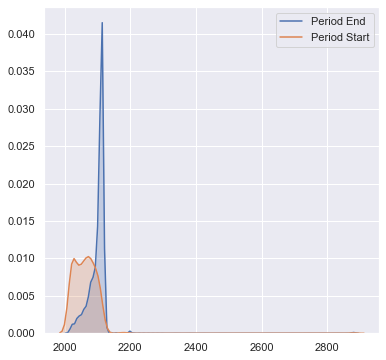

In [222]:
sns.kdeplot(df['Period End'],shade=True)
sns.kdeplot(df['Period Start'],shade=True)
plt.savefig('knn.png')

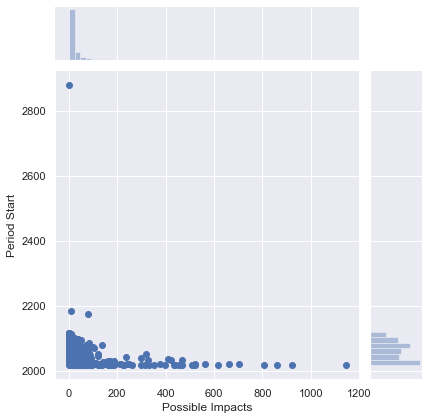

In [225]:
sns.jointplot(x='Possible Impacts',y='Period Start',kind='scatter',data=df)

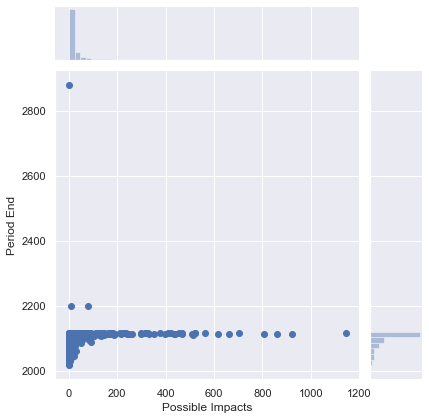

In [228]:
sns.jointplot(x='Possible Impacts',y='Period End',kind='scatter',data=df)
plt.savefig('kndsdn.png')

In [203]:
df.sort_values('Kinetic Energy', ascending=False)['Object Name'].head(10)

58          2010 AU118
173          2011 SR52
682    29075 (1950 DA)
54           2001 CA21
225           2017 CH1
305            1979 XB
587         2005 GV190
4           2015 ME131
344           2010 CR5
27           2014 MV67
Name: Object Name, dtype: object

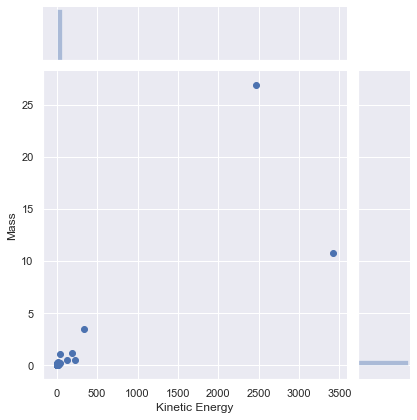

In [204]:
sns.jointplot(x='Kinetic Energy',y='Mass',kind='scatter',data=df)
plt.savefig('kinetic_impact.png')

# DataSet NO.3 
### This DataSet contains records of all meteorites that was discovered or tracked while falling on earth and their properties

### Data was collected by NASA's Near Earth Object Program at the Jet Propulsion Laboratory (California Institute of Technology).

### Data Features:

#### recclass: Classification of object according to physical, chemical, and other characteristics
#### year: The year the meteorite fell, or the year it was found (depending on the value of fell)
#### fall: Whether the meteorite was seen falling, or was discovered after its impact
#### Reclat & Reclong: Geo data of the landing place



In [60]:
#meteroits that have been found on earth and their location
#import pandas as pd
df=pd.read_csv('meteorite-landings.csv')
df
# places with highest damage
# places with lowest damages
# highest mass and where it landed
#lowest mass and where its landing
#years viz representing highest & lowest years
#years with highest impact and where 
# speed average from impacts
# velocity
# no velocity or speed data cuz most meteroites were found and not tracked
# valid has not been degraded by weather on Earth
# relict has been highly degraded by weather on Earth
# reclass types of meteroite iron - stione - etc

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [61]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [63]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [64]:
df['mass']=df['mass']/1000
#indices=detect_outliers(df,0,[['mass']])
#df.loc[indices,'mass']=df['mass'].median()
df.drop('GeoLocation',axis=1,inplace=True)
df = df[(df.year > 860) & (df.year < 2016)]
df.year = df.year.astype(int)
df = df[(df.reclat >=-180) & (df.reclong <= 180)]
#df = df.replace(0.00000, np.nan)
df['volume']=df['mass']/3
#df.dropna(inplace=True)

C:\Users\101\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
count = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

In [ ]:
u=Nominatim(user_agent='mm')
def get_country(x):
    try:
        return u.reverse(f"{x['reclat']},{x['reclong']}", language='en').raw['address']['country']
    except:
        try:
            p=u.geocode(f"{x['name']}", language='en').raw['display_name']
            p=p.split(", ")
            for loc in p:
                if loc in count:
                    return loc
        except:
            pass
            

df2['Country']=df2.apply(get_country,axis=1)

In [57]:
df=pd.read_csv('meteorite.csv')

df['mass'].mean()

15.601510370214905

In [17]:
df['volume'].mean()

5.200503456738337

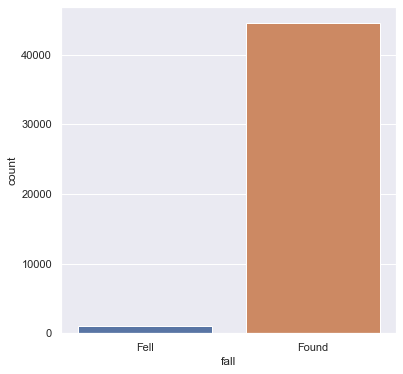

In [270]:
sns.countplot(x='fall',data=df)
plt.savefig('fallfell.png')

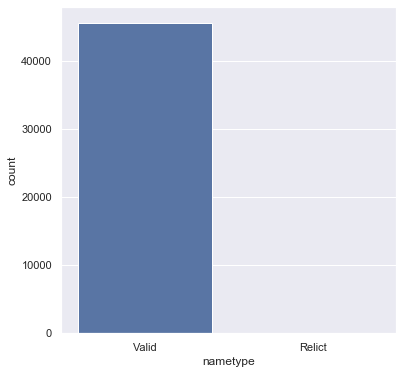

In [271]:
sns.countplot(x='nametype',data=df)
plt.savefig('type.png')

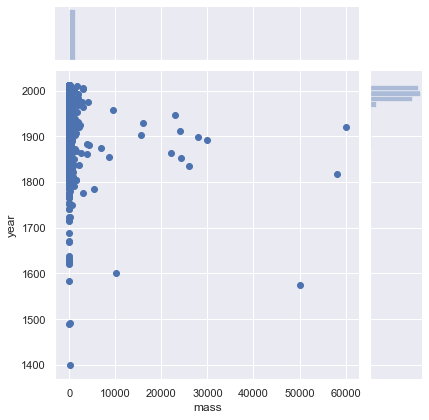

In [53]:
sns.jointplot(x='mass',y='year',kind='scatter',data=df)
plt.savefig('massyear.png')

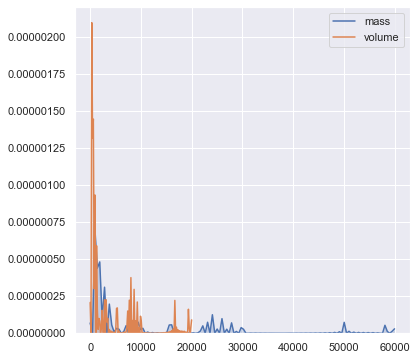

In [65]:
sns.kdeplot(df['mass'],shade=True)
sns.kdeplot(df['volume'],shade=True)
plt.savefig('massvoolllllll.png')

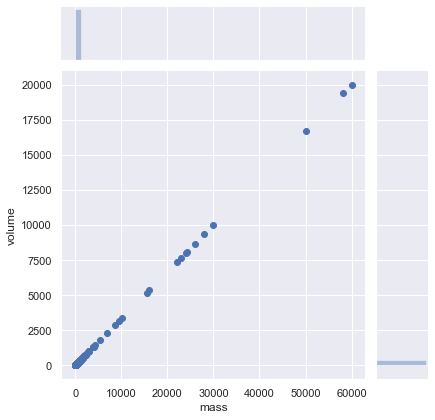

In [66]:
sns.jointplot(x='mass',y='volume',kind='scatter',data=df)
plt.savefig('massyear.png')

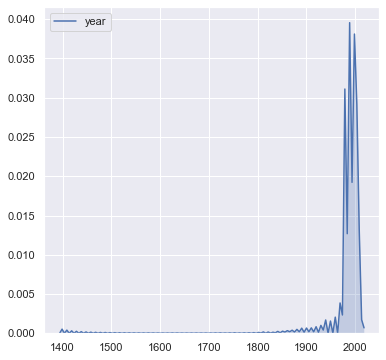

In [8]:
sns.kdeplot(df['year'],shade=True)
plt.savefig('massyear2.png')

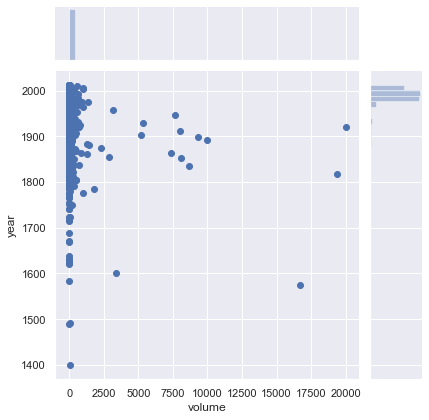

In [46]:
sns.jointplot(x='volume',y='year',kind='scatter',data=df)

In [48]:
df[(df['mass']==max(df['mass']))]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,volume
16383,Hoba,11890,Valid,"Iron, IVB",60000.0,Found,1920,-19.58333,17.91667,20000.0


In [47]:
df[(df['volume']==max(df['volume']))]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,volume
16383,Hoba,11890,Valid,"Iron, IVB",60000.0,Found,1920,-19.58333,17.91667,20000.0


In [49]:
df.sort_values('mass', ascending=False)['name'].head(10)

16383               Hoba
5336           Cape York
5329     Campo del Cielo
5333       Canyon Diablo
3433             Armanty
12600             Gibeon
5431          Chupaderos
26293        Mundrabilla
916         Sikhote-Alin
4981          Bacubirito
Name: name, dtype: object

In [9]:
df.sort_values('year', ascending=False)['year'].head(10)

194      2013
3403     2012
17252    2012
36403    2012
21698    2012
86       2012
38108    2012
17387    2012
17386    2012
22890    2012
Name: year, dtype: int32

In [10]:
df['year'].mode()

0    1979
dtype: int32

In [50]:
df.sort_values('volume', ascending=False)['name'].head(10)

16383               Hoba
5336           Cape York
5329     Campo del Cielo
5333       Canyon Diablo
3433             Armanty
12600             Gibeon
5431          Chupaderos
26293        Mundrabilla
916         Sikhote-Alin
4981          Bacubirito
Name: name, dtype: object

In [59]:
sns.set(rc={'figure.figsize': [12, 12]}, font_scale=1.)

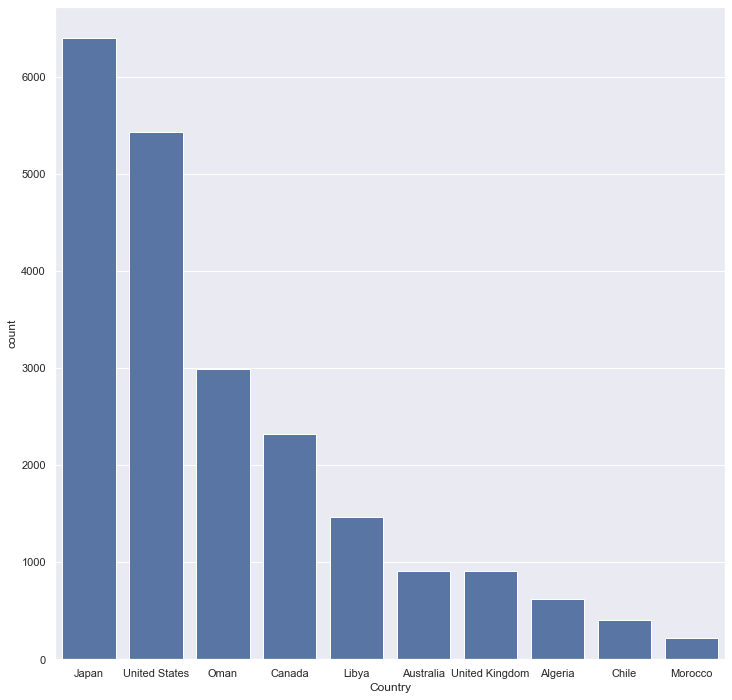

In [63]:
sns.countplot(x='Country',data=df, order=pd.value_counts(df['Country']).iloc[:10].index,color='b')
plt.savefig('country.png')

In [87]:
import folium
gel = df.sample(1000)
met = folium.Map()
metf = folium.map.FeatureGroup()

In [88]:
for lat,lng in zip(gel.reclat,gel.reclong):
    metf.add_child(folium.features.Marker([lat,lng]))

In [89]:
met.add_child(metf)

In [51]:
df3

,id,spkid,full_name,pdes,Near-Earth,potential hazards,absolute magnitude,diameter,orbit_id,moid,moid_ld,class,impact,radius (km),volume,Mass
432,a0000433,2000433,433 Eros (1898 DQ),433,1,0,10.400,16.840,656,0.148623,57.839613,AMO,0,8.4200,2499.220987,7497.662961
718,a0000719,2000719,719 Albert (1911 MT),719,1,0,15.400,NaN,JPL 214,0.203482,79.189090,AMO,0,NaN,NaN,NaN
886,a0000887,2000887,887 Alinda (1918 DB),887,1,0,13.800,4.200,223,0.082217,31.996351,AMO,0,2.1000,38.772720,116.318160
1035,a0001036,2001036,1036 Ganymed (1924 TD),1036,1,0,9.400,37.675,783,0.344956,134.246527,AMO,0,18.8375,27985.829289,83957.487867
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,1,0,17.700,1.000,JPL 88,0.107451,41.816706,AMO,0,0.5000,0.523333,1.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958510,bK20K04M,54017229,(2020 KM4),2020 KM4,1,0,27.898,NaN,JPL 1,0.005380,2.093544,APO,0,NaN,NaN,NaN
958511,bK20K04N,54017231,(2020 KN4),2020 KN4,1,0,21.510,NaN,JPL 1,0.057911,22.537107,APO,0,NaN,NaN,NaN
958512,bK20K04O,54017230,(2020 KO4),2020 KO4,1,0,26.980,NaN,JPL 1,0.003895,1.515833,APO,0,NaN,NaN,NaN
958513,bK20K04Q,54017232,(2020 KQ4),2020 KQ4,1,0,26.419,NaN,JPL 1,0.002528,0.983884,APO,0,NaN,NaN,NaN


In [52]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,volume
0,Aachen,1,Valid,L5,0.0210,Fell,1880,50.77500,6.08333,0.007000
1,Aarhus,2,Valid,H6,0.7200,Fell,1951,56.18333,10.23333,0.240000
2,Abee,6,Valid,EH4,107.0000,Fell,1952,54.21667,-113.00000,35.666667
3,Acapulco,10,Valid,Acapulcoite,1.9140,Fell,1976,16.88333,-99.90000,0.638000
4,Achiras,370,Valid,L6,0.7800,Fell,1902,-33.16667,-64.95000,0.260000
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,0.1720,Found,1990,29.03700,17.01850,0.057333
45712,Zinder,30409,Valid,"Pallasite, ungrouped",0.0460,Found,1999,13.78333,8.96667,0.015333
45713,Zlin,30410,Valid,H4,0.0033,Found,1939,49.25000,17.66667,0.001100
45714,Zubkovsky,31357,Valid,L6,2.1670,Found,2003,49.78917,41.50460,0.722333


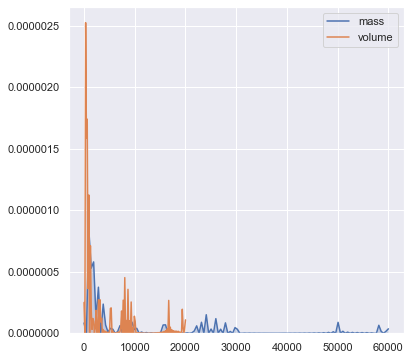

In [55]:
sns.kdeplot(df['mass'],shade=True)
sns.kdeplot(df['volume'],shade=True)

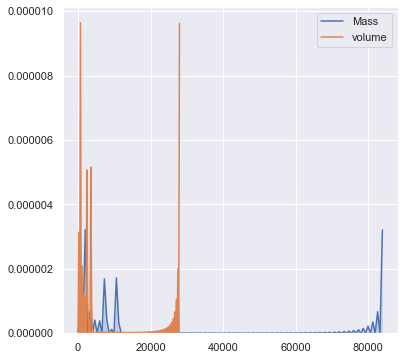

In [56]:
sns.kdeplot(df3['Mass'],shade=True)
sns.kdeplot(df3['volume'],shade=True)

In [85]:
df['mass'].mean()

17555.010707132195

In [86]:
df3['Mass'].mean()

137.3691618978303

In [82]:
df['volume'].mean()

5.200503456738337

In [83]:
df3['volume'].mean()

45.78972063261015

In [ ]:
indices=detect_outliers(df,0,[['diameter']])
df.loc[indices,'diameter']=df['diameter'].median()

In [15]:
df['volume'].mean()

6.228255884354846

In [13]:
df['mass'].mean()

18.684767653064473

In [60]:
df['volume'].mean()

6.228255884354846